# Implementar

- Modelos 
    - [X] LGBM
    - [ ] XGboost
    - [X] Random Forest
    - [X] Linear (logistic -> binary, OLS -> regression)
- [X] grafico loss treino
-  eval metrics dashboard
    - [X] regressao
    - [X] binario
    - [ ] multiclasse
- Grafico resultados
    - [X] Regressao
    - [X] Binario
    - [ ] Multiclasse
- [X] Otimização Bayesiana
- [X] report otimizacao bayesiana
- [X] SHAP brabo
- [ ] Analise acuracia conforme aumento de dados
- [X] implementar CV
- Metodos split train val
    - [ ] shuffled
    - [ ] temporal
    - [ ] grupos
- [ ] Salvar modelo
- [ ] carregar modelo

In [1]:
import pandas as pd
import sys

%load_ext autoreload
%autoreload 2

sys.path.insert(1, '../src/')

from guara.modeling.supervised_modelz import *
import utils

pd.set_option('display.max_columns', None)

# Import dataset

In [2]:
df = utils.import_s3_example_dataset('marketing').drop('ID', axis = 1)

df.head()

Education Marital_Status     Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduation         Single  10.970592        0         0       58  6.455199   
1  Graduation         Single  10.743869        1         1       38  2.484907   
2  Graduation       Together  11.179046        0         0       26  6.056784   
3  Graduation       Together  10.190432        1         0       26  2.484907   
4         PhD        Married  10.973254        1         0       94  5.159055   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0   4.488636         6.304449         5.153292          4.488636   
1   0.693147         1.945910         1.098612          0.693147   
2   3.912023         4.852030         4.718499          3.091042   
3   1.609438         3.044522         2.397895          1.386294   
4   3.784190         4.779123         3.850148          3.332205   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0      4.488636           1.386294                8             2.397895   
1      1.945910           1.098612                1             0.693147   
2      3.761200           0.693147                8             1.098612   
3      1.791759           1.098612                2             0.000000   
4      2.772589           1.791759                5             1.386294   

   NumStorePurchases  NumWebVisitsMonth  Complain  Response  idade  \
0                  4                  7         0         1     63   
1                  2                  5         0         0     66   
2                 10                  4         0         0     55   
3                  4                  6         0         0     36   
4                  6                  5         0         0     39   

   dias_cliente  education_n  parceiro  pessoas_casa  renda_per_capta  \
0          2675            2         0             1        10.970592   
1          2125            2         0             3         9.645300   
2          2324            2         1             2        10.485913   
3          2151            2         1             3         9.091895   
4          2173            4         1             3         9.874676   

   compra_total_ano  porcentagem_compras_gold  gasto_renda  total_purchases  \
0             764.5                  0.055959     0.013064               22   
1              10.5                  0.251314     0.000227                4   
2             367.0                  0.055643     0.005112               20   
3              24.0                  0.099091     0.000900                6   
4             203.5                  0.036192     0.003485               14   

   disc_purchases  num_compras_ano  percent_disc_compra  ticket_medio  \
0        1.386294         3.001869             0.136364      5.543906   
1        1.098612         0.687059             0.500000      2.790093   
2        0.693147         3.141136             0.050000      4.769300   
3        1.098612         1.018131             0.333333      3.201632   
4        1.791759         2.351588             0.357143      4.472065   

   conversao_site  cupons_aceitados  
0        0.012736                 0  
1        0.002820                 0  
2        0.025490                 0  
3        0.004638                 0  
4        0.013711                 0

In [3]:
# transforma colunas object pra category
# FAZER ISSO NO PIPELINE
for col in df.columns:
    if is_string_dtype(df[col]):
        df[col] = df[col].astype('category')

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype.name == 'category':
        df[col] = le.fit_transform(df[col])


# Train, Val

In [4]:
train_split = 0.8
n_train_split = int(train_split*len(df))
var_resp = 'Response'

train = df.iloc[:n_train_split, :].copy()
val = df.iloc[n_train_split:, :].copy()

Xtrain = train.drop(var_resp, axis = 1)
ytrain = train[var_resp]

Xval = val.drop(var_resp, axis = 1)
yval = val[var_resp]

-----------------------------------------------------------------

# Training

### Linear Regression

In [31]:
md = SupervisedModelz('linear', 'regression')

In [32]:
params = {
    
    'missing': 'drop',
    'hasconst':False,
    #'class_weight': 'balanced',
    
}

model = md.fit(Xtrain, None, ytrain, None, params)

Treinando o modelo LINEAR, objetivo REGRESSION... 

Modelo treinado em 0.0 minutos 



In [33]:
md.plot_train_info()

                                 OLS Regression Results                                
Dep. Variable:               Response   R-squared (uncentered):                   0.462
Model:                            OLS   Adj. R-squared (uncentered):              0.451
Method:                 Least Squares   F-statistic:                              45.17
Date:                Wed, 31 Mar 2021   Prob (F-statistic):                   9.02e-207
Time:                        15:00:58   Log-Likelihood:                         -268.91
No. Observations:                1772   AIC:                                      603.8
Df Residuals:                    1739   BIC:                                      784.6
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

Remocao de nans
Treino: 0
Validacao: 0


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


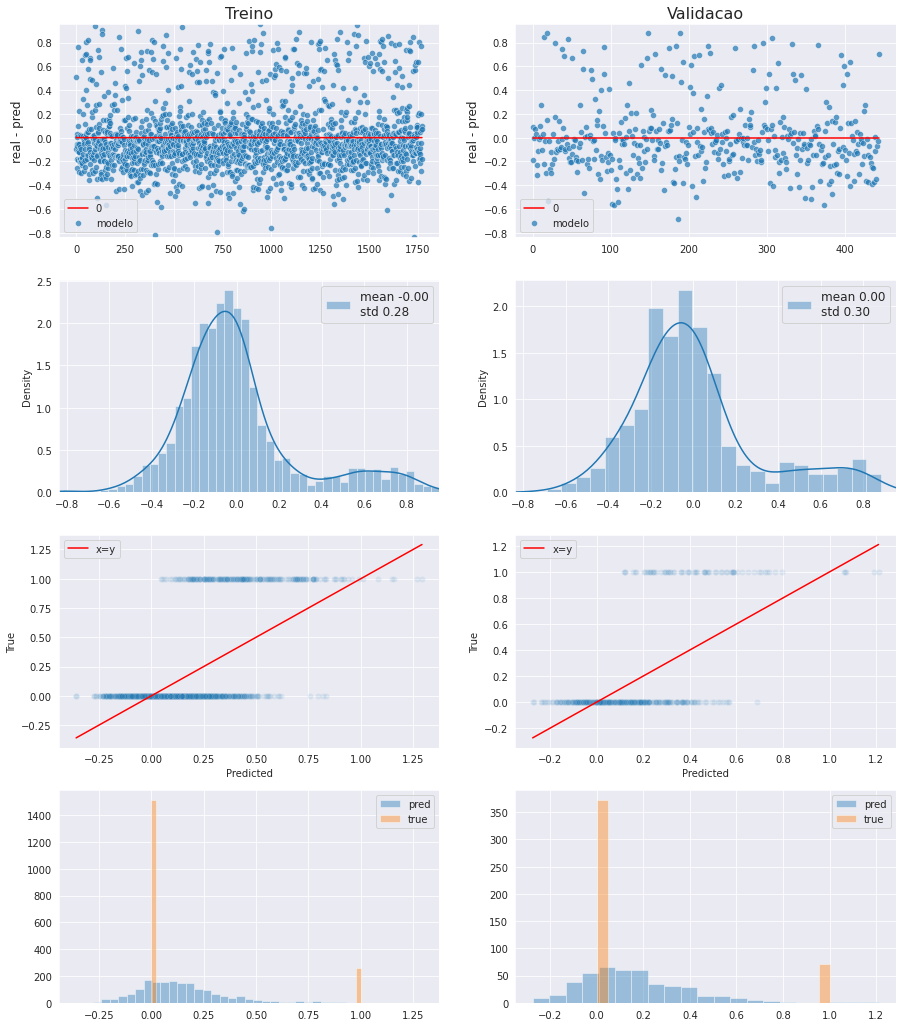

In [34]:
ytrain_pred = md.predict(Xtrain)
yval_pred = md.predict(Xval)

md.evaluation_plots(ytrain.values, ytrain_pred, yval.values, yval_pred)

In [35]:
metrics = ['MAE', 'MeAE', 'R2', 'MSLE', 'MAPE']

print('TREINO:\n')
metrics_train = md.metrics_print(ytrain.values, ytrain_pred.clip(0, None), metrics)
print('\nVALIDACAO:\n')
metrics_val = md.metrics_print(yval.values, yval_pred.clip(0, None), metrics)

TREINO:

|    MAE |   MeAE |     R2 |   MSLE |   MAPE |
|--------|--------|--------|--------|--------|
| 0.1792 | 0.1126 | 0.3896 | 0.0385 |    nan |

VALIDACAO:

|    MAE |   MeAE |     R2 |   MSLE |   MAPE |
|--------|--------|--------|--------|--------|
| 0.1931 | 0.1235 | 0.3718 | 0.0428 |    nan |


divide by zero encountered in true_divide
invalid value encountered in true_divide
divide by zero encountered in true_divide
invalid value encountered in true_divide


### Logistic Regression

In [36]:
md = SupervisedModelz('linear', 'binary')

In [37]:
params = {
    
    #'penalty': 'elasticnet',
    #'l1_ratio': 0.3,
    'C': 1,
    'class_weight': 'balanced',
    'solver': 'lbfgs',
    'max_iter': 1000,
    'n_jobs': -1,
    
}

model = md.fit(Xtrain, Xval, ytrain, yval, params)

Treinando o modelo LINEAR, objetivo BINARY... 

Modelo treinado em 0.04 minutos 



In [38]:
ytrain_pred = md.predict(Xtrain)
yval_pred = md.predict(Xval)

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


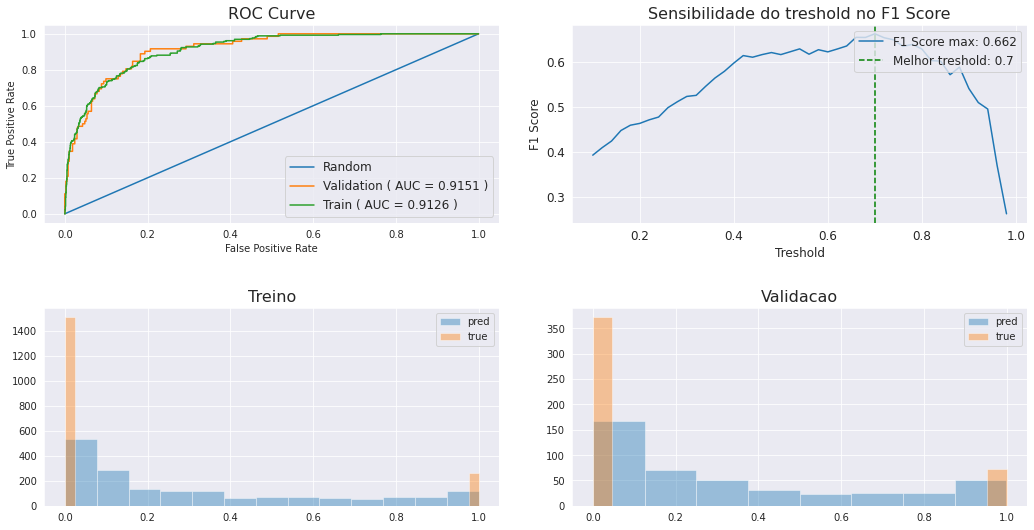

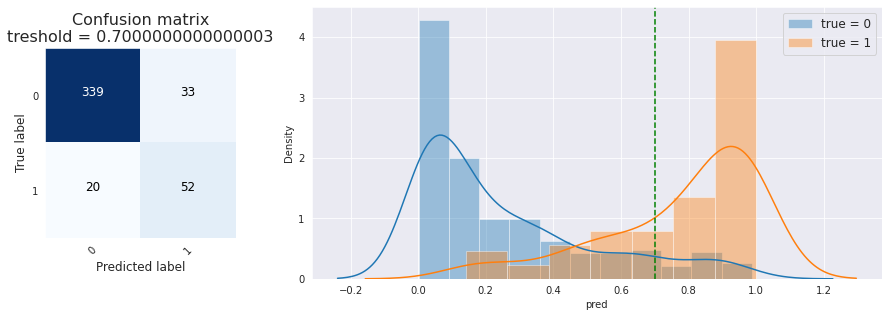


              precision    recall  f1-score   support

           0       0.94      0.91      0.93       372
           1       0.61      0.72      0.66        72

    accuracy                           0.88       444
   macro avg       0.78      0.82      0.79       444
weighted avg       0.89      0.88      0.88       444



In [39]:
md.evaluation_plots(ytrain.values, ytrain_pred, yval.values, yval_pred)

In [40]:
metrics = ['Accuracy', 'Recall', 'Precision', 'F1', 'ROC_AUC']
#metrics = ['ROC_AUC']

print('TREINO:\n')
metrics_train = md.metrics_print(ytrain.values, ytrain_pred, metrics)
print('\nVALIDACAO:\n')
metrics_val = md.metrics_print(yval.values, yval_pred, metrics)

TREINO:



VALIDACAO:




## Random Forest

In [41]:
md = SupervisedModelz('random_forest', 'binary')

In [42]:
params = {
    
    'n_jobs': -1,
    'n_estimators':100,
    'class_weight': 'balanced',
    #'criterion': 'mse',
    'max_depth': 20,
    'min_samples_split': 2,
    'min_samples_leaf':1,
    
}

model = md.fit(Xtrain, Xval, ytrain, yval, params)

Treinando o modelo RANDOM_FOREST, objetivo BINARY... 

Modelo treinado em 0.01 minutos 



`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


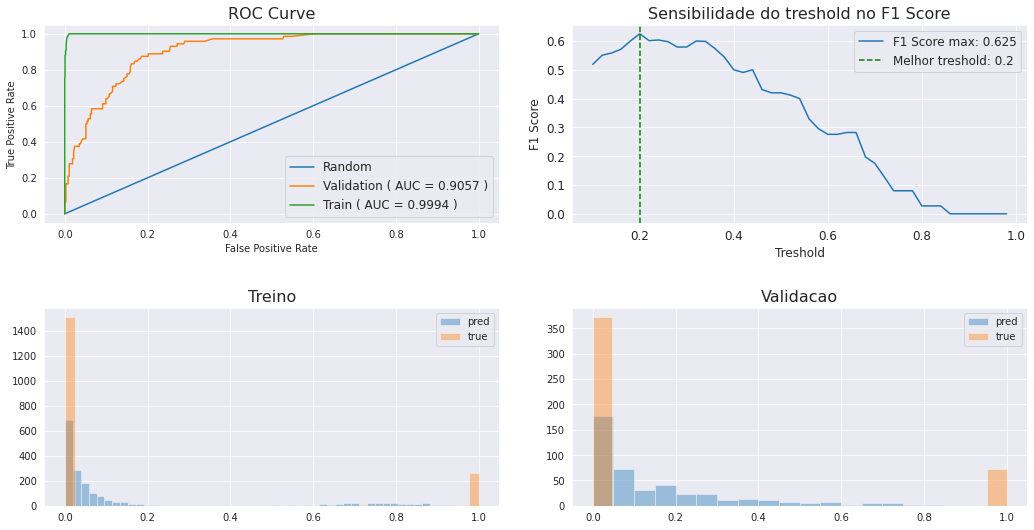

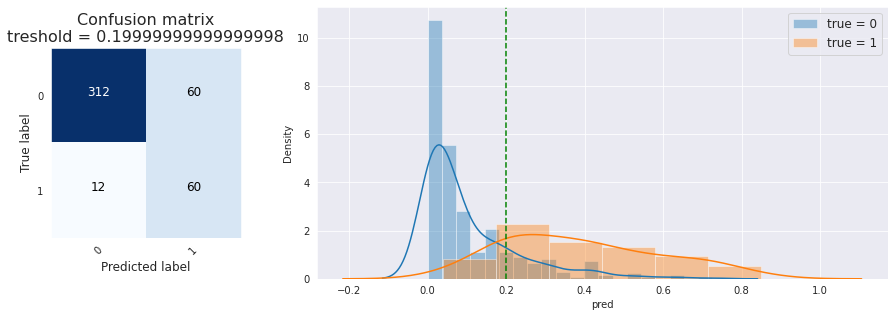


              precision    recall  f1-score   support

           0       0.96      0.84      0.90       372
           1       0.50      0.83      0.62        72

    accuracy                           0.84       444
   macro avg       0.73      0.84      0.76       444
weighted avg       0.89      0.84      0.85       444



In [43]:
ytrain_pred = md.predict(Xtrain)
yval_pred = md.predict(Xval)

md.evaluation_plots(ytrain.values, ytrain_pred, yval.values, yval_pred)

In [27]:
metrics = ['Accuracy', 'Recall', 'Precision', 'F1', 'ROC_AUC']
#metrics = ['ROC_AUC']

print('TREINO:\n')
metrics_train = md.metrics_print(ytrain.values, ytrain_pred, metrics)
print('\nVALIDACAO:\n')
metrics_val = md.metrics_print(yval.values, yval_pred, metrics)

TREINO:



VALIDACAO:




## LGBM

In [19]:
Xtrain.shape

(1772, 34)

In [20]:
Xval.shape

(444, 34)

In [23]:
md = SupervisedModelz('lgbm', 'binary')

params = {

    'random_state': 501,
    'boosting_type': 'gbdt',
    'device_type': 'cpu', # 'cpu'
    'is_unbalanced':'true',
    #'metric': 'huber',
    'learning_rate': 0.01,
    'colsample_bytree': 0.7,
    'max_depth': -1,
    'n_estimators': 2000,
    'sub_sample': 0.8,
    'num_leaves': 10,
    'min_child_samples': 24,
    
 }

model = md.fit(Xtrain, Xval, ytrain, yval, params)

Treinando o modelo LGBM, objetivo BINARY... 

[LightGBM] [Warning] Unknown parameter: is_unbalanced
[LightGBM] [Warning] Unknown parameter: sub_sample
[LightGBM] [Warning] Unknown parameter: is_unbalanced
[LightGBM] [Warning] Unknown parameter: sub_sample
[LightGBM] [Info] Number of positive: 261, number of negative: 1511
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3712
[LightGBM] [Info] Number of data points in the train set: 1772, number of used features: 33
[LightGBM] [Warning] Unknown parameter: is_unbalanced
[LightGBM] [Warning] Unknown parameter: sub_sample
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.147291 -> initscore=-1.756007
[LightGBM] [Info] Start training from score -1.756007
Modelo treinado em 0.02 minutos 



Model best iteration: 832

BINARY_LOGLOSS loss:
Train: 0.1116
Val  : 0.2444


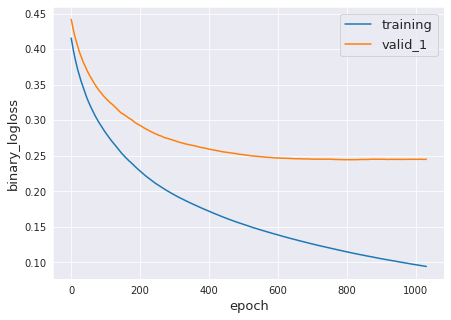

In [24]:
md.plot_train_info()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


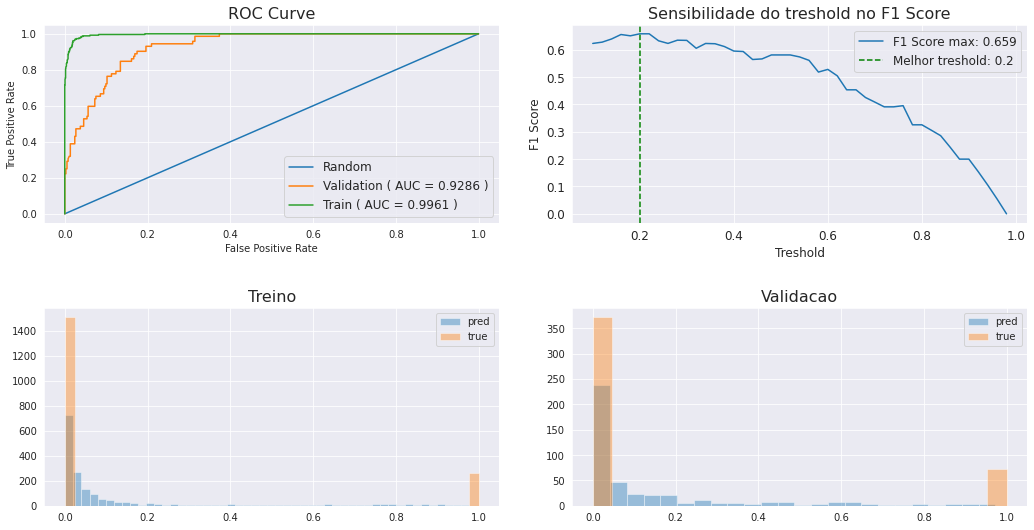

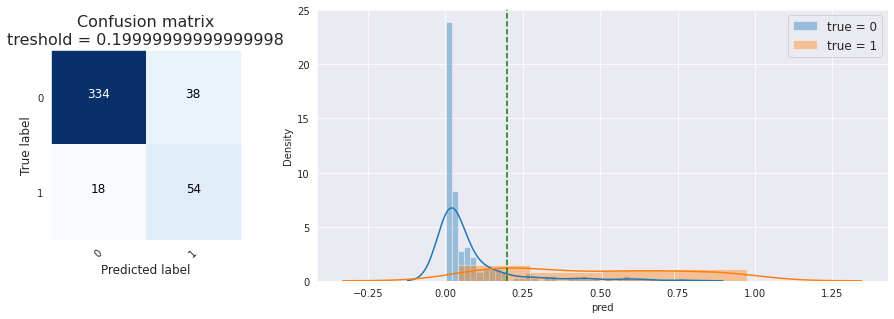


              precision    recall  f1-score   support

           0       0.95      0.90      0.92       372
           1       0.59      0.75      0.66        72

    accuracy                           0.87       444
   macro avg       0.77      0.82      0.79       444
weighted avg       0.89      0.87      0.88       444



In [25]:
ytrain_pred = md.predict(Xtrain)
yval_pred = md.predict(Xval)

md.evaluation_plots(ytrain.values, ytrain_pred, yval.values, yval_pred)

In [28]:
metrics = ['Accuracy', 'Recall', 'Precision', 'F1', 'ROC_AUC']
#metrics = ['ROC_AUC']

print('TREINO:\n')
metrics_train = md.metrics_print(ytrain.values, ytrain_pred, metrics)
print('\nVALIDACAO:\n')
metrics_val = md.metrics_print(yval.values, yval_pred, metrics)

TREINO:

|   Accuracy |   Recall |   Precision |     F1 |   ROC_AUC |
|------------|----------|-------------|--------|-----------|
|     0.9464 |   0.9885 |      0.7371 | 0.8445 |    0.9638 |

VALIDACAO:

|   Accuracy |   Recall |   Precision |     F1 |   ROC_AUC |
|------------|----------|-------------|--------|-----------|
|     0.8739 |   0.7500 |      0.5870 | 0.6585 |    0.8239 |


-----------------------------------------------------------------

# Bayesian Optimization

In [5]:
md = SupervisedModelz('random_forest', 'binary')

param_search = {
    'fixed': {
        'class_weight': 'balanced'
    },
    'search': [
        {
            'name': 'max_depth',
            'range': [1, 100],
            'type': 'integer_uniform'
        },{
            'name': 'n_estimators',
            'range': [1, 1000],
            'type': 'integer_uniform'
        },{
            'name': 'min_samples_split',
            'range': [2, 30],
            'type': 'integer_uniform'
        },{
            'name': 'min_samples_leaf',
            'range': [1, 100],
            'type': 'integer_uniform'
        }
    ]
}

r = md.optuna_optimization(Xtrain, ytrain, param_search, 'ROC_AUC', splits=5, trials = 20)

[I 2021-03-31 16:23:03,043] A new study created in memory with name: no-name-9309899c-7472-4665-a560-bc0aff30fb33
[I 2021-03-31 16:23:19,297] Trial 0 finished with value: 0.7910954371273723 and parameters: {'max_depth': 52, 'n_estimators': 861, 'min_samples_split': 16, 'min_samples_leaf': 72}. Best is trial 0 with value: 0.7910954371273723.
[I 2021-03-31 16:23:19,763] Trial 1 finished with value: 0.7762254758065492 and parameters: {'max_depth': 61, 'n_estimators': 21, 'min_samples_split': 8, 'min_samples_leaf': 83}. Best is trial 0 with value: 0.7910954371273723.
[I 2021-03-31 16:23:25,917] Trial 2 finished with value: 0.7746255327333194 and parameters: {'max_depth': 87, 'n_estimators': 331, 'min_samples_split': 12, 'min_samples_leaf': 88}. Best is trial 0 with value: 0.7910954371273723.
[I 2021-03-31 16:23:45,931] Trial 3 finished with value: 0.8678739246354071 and parameters: {'max_depth': 100, 'n_estimators': 872, 'min_samples_split': 25, 'min_samples_leaf': 3}. Best is trial 3 with

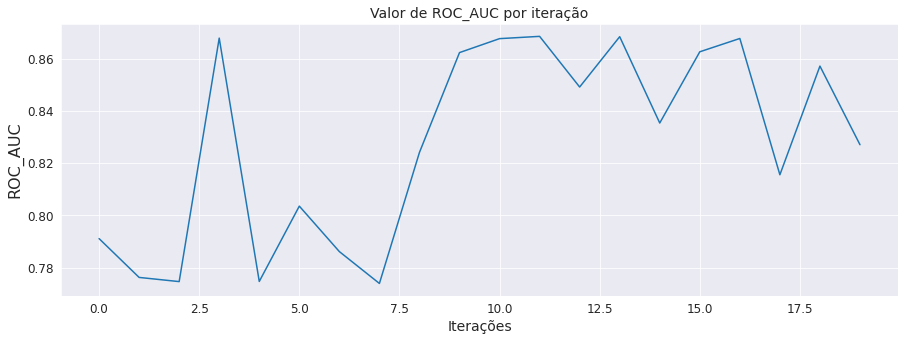

In [7]:
import plotly.io as pio
pio.renderers.default='notebook'
df_bo = md.bayesian_optmization_report(r.trials_dataframe())

In [15]:
df_bo.head()

params_max_depth  params_min_samples_leaf  params_min_samples_split  \
11                99                        2                        24   
13                98                        2                        24   
3                100                        3                        25   
16                74                        3                        20   
10                98                        1                        22   

    params_n_estimators   ROC_AUC  
11                  986  0.868550  
13                  984  0.868420  
3                   872  0.867874  
16                  686  0.867736  
10                  933  0.867675

### Fitting model with best params

In [53]:
model = md.fit_best_params(Xtrain, Xval, ytrain, yval, r)

fit para ROC_AUC = 0.8685 [idx = 11]
Treinando o modelo RANDOM_FOREST, objetivo BINARY... 

Modelo treinado em 0.11 minutos 



### Evaluating model

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


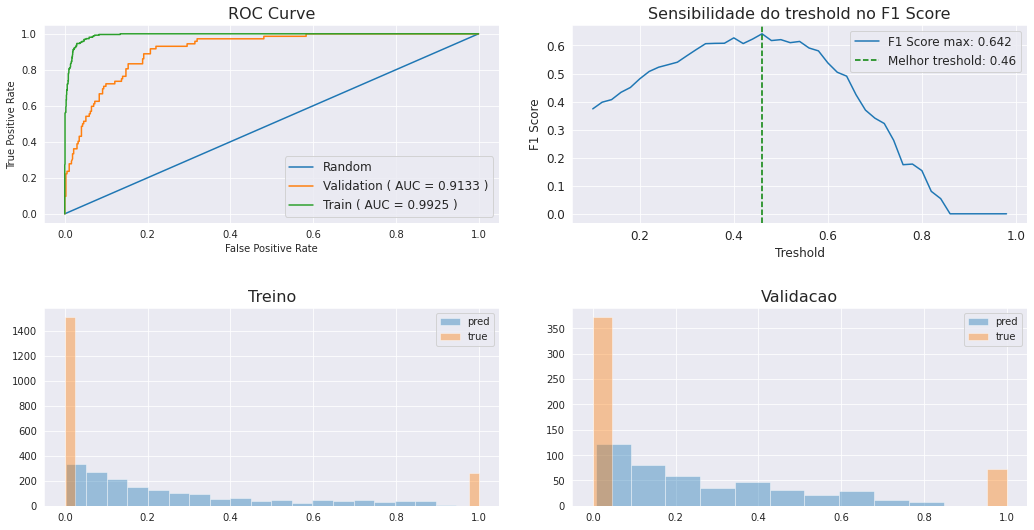

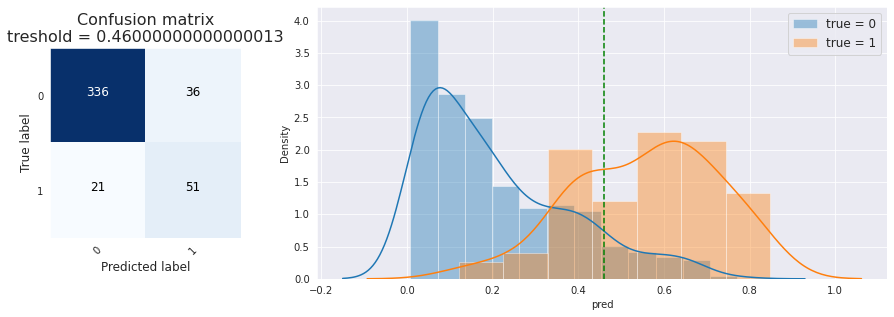


              precision    recall  f1-score   support

           0       0.94      0.90      0.92       372
           1       0.59      0.71      0.64        72

    accuracy                           0.87       444
   macro avg       0.76      0.81      0.78       444
weighted avg       0.88      0.87      0.88       444



In [54]:
ytrain_pred = md.predict(Xtrain)
yval_pred = md.predict(Xval)

md.evaluation_plots(ytrain.values, ytrain_pred, yval.values, yval_pred)

# Shap

In [29]:
df_shap = md.init_shap(Xval)

df_shap.head()

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


Education  Marital_Status    Income   Kidhome  Teenhome   Recency  \
0  -0.053006       -0.003008 -0.118359 -0.011048 -0.118994 -0.078009   
1  -0.055323        0.076933  0.149162  0.013692 -0.093861  1.652606   
2   0.234679        0.028590 -0.028006  0.011663 -0.074812  0.432385   
3  -0.191869       -0.010693 -0.035728 -0.006070  0.047162 -1.251392   
4  -0.075116        0.020412  0.142490  0.009977  0.047969 -0.369531   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0 -0.094836  -0.013935         0.175037        -0.084287          0.081014   
1  0.055370   0.001297        -0.326874        -0.038214         -0.067683   
2  0.030744  -0.012349        -0.393393         0.020934         -0.066407   
3 -0.084746   0.015728         0.117183        -0.104263          0.074596   
4  0.024480  -0.017017        -0.183918        -0.017546         -0.035691   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0      0.045407          -0.023573         0.016589             0.094290   
1      0.045580          -0.023458        -0.080362             0.069071   
2     -0.190845          -0.023703        -0.091390            -0.288441   
3      0.086662          -0.008484        -0.017230             0.234535   
4     -0.154988          -0.009119        -0.059695             0.053004   

   NumStorePurchases  NumWebVisitsMonth  Complain     idade  dias_cliente  \
0          -0.467174          -0.290245       0.0 -0.034756     -0.470881   
1           0.148165          -0.238204       0.0  0.053378     -0.134087   
2          -0.039241          -0.360086       0.0  0.049278     -0.719865   
3          -0.312693          -0.164850       0.0  0.031228     -0.221575   
4           0.125410           0.183403       0.0 -0.021841     -0.582005   

   education_n  parceiro  pessoas_casa  renda_per_capta  compra_total_ano  \
0    -0.010049 -0.079284     -0.046533        -0.186944         -0.023261   
1    -0.015722 -0.159630     -0.059818         0.021161          0.007874   
2     0.086269  0.316452     -0.042012        -0.135616          0.007579   
3    -0.033049 -0.117899     -0.037012         0.018723          0.044772   
4    -0.019470  0.215704     -0.031739        -0.114152         -0.002116   

   porcentagem_compras_gold  gasto_renda  total_purchases  disc_purchases  \
0                 -0.068110     0.002335         0.005095       -0.006540   
1                  0.087425    -0.014933         0.008624       -0.004842   
2                 -0.236719    -0.054083         0.005964       -0.005721   
3                 -0.083333     0.007694         0.021781       -0.002166   
4                 -0.079554     0.054429         0.007093       -0.001431   

   num_compras_ano  percent_disc_compra  ticket_medio  conversao_site  \
0        -0.047409            -0.079292     -0.026688       -0.006957   
1         0.041458             0.462858     -0.031501        0.028606   
2         0.044040             0.293596      0.007242       -0.024133   
3        -0.067954            -0.048296     -0.020787        0.006624   
4         0.048676            -0.070984      0.006653        0.023037   

   cupons_aceitados  
0         -0.388381  
1         -0.409001  
2         -0.516712  
3          0.929241  
4         -0.475524

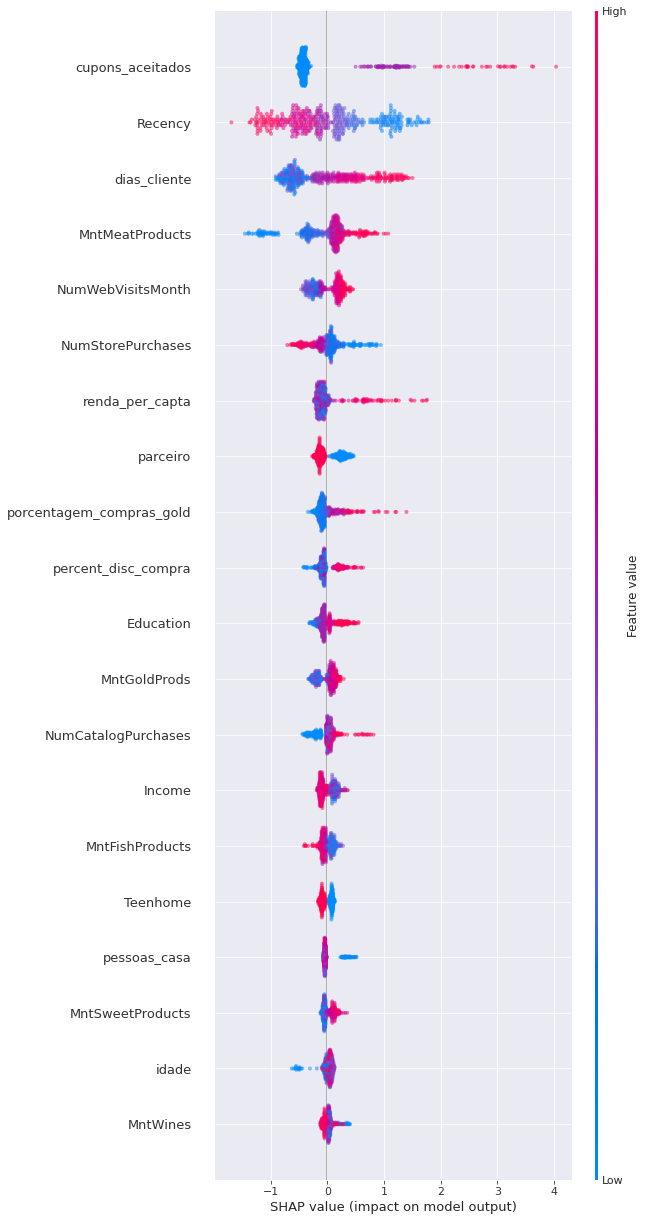

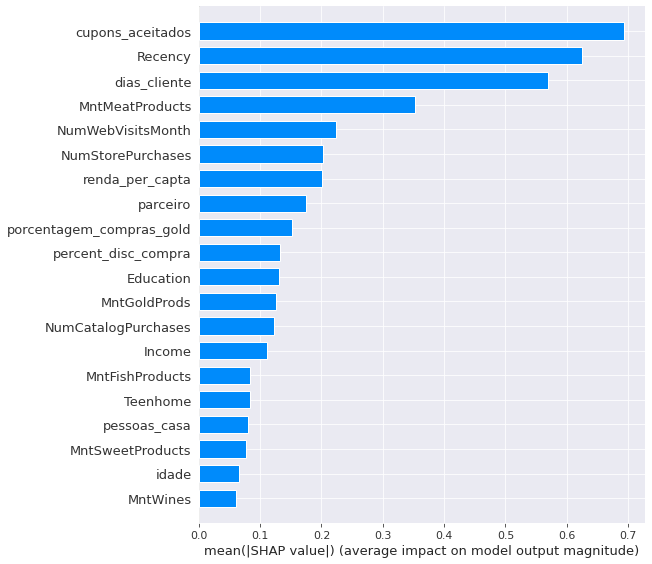

In [30]:
importance = md.shap_importance(Xval)

In [31]:
importance

cupons_aceitados            0.693072
Recency                     0.625561
dias_cliente                0.568775
MntMeatProducts             0.352751
NumWebVisitsMonth           0.224193
NumStorePurchases           0.203155
renda_per_capta             0.200597
parceiro                    0.174771
porcentagem_compras_gold    0.152361
percent_disc_compra         0.132355
Education                   0.130649
MntGoldProds                0.126619
NumCatalogPurchases         0.122667
Income                      0.111853
MntFishProducts             0.083942
Teenhome                    0.083781
pessoas_casa                0.080306
MntSweetProducts            0.076516
idade                       0.066051
MntWines                    0.060786
NumWebPurchases             0.055815
education_n                 0.052589
num_compras_ano             0.051256
conversao_site              0.043077
compra_total_ano            0.034979
ticket_medio                0.032894
gasto_renda                 0.030512
N

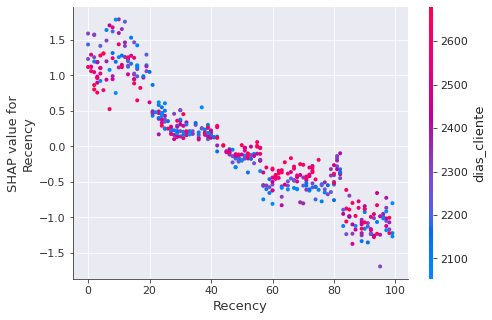

In [32]:
md.shap_dependence(Xval , 'Recency', 'dias_cliente')